In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import Bio.SeqUtils.MeltingTemp as mt

import seaborn as sns
from dredFISH.Utils.__init__plots import *
from dredFISH.Utils import basicu

In [3]:
def recalc_tm(seq, fmd=0, Na=1e-5, dnac1=0, dnac2=0):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [4]:
def check_monomer(seq):
    return seq.count('AAAA')+seq.count('TTTT')+seq.count('GGGG')+seq.count('CCCC')

In [5]:
# f = "/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq/dredFISH_PNMF_DPNMF_IEG_pFinal_Oligos_Nov2022_v3.fasta"
# f = "/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq/dredFISH_PNMF_DPNMF_IEG_pFinal_Oligos_Nov2022_v4.fasta"
# f = "/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq/dredFISH_PNMF_DPNMF_IEG_pFinal_Oligos_Nov2022_v5.fasta"
f = "/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq/dredFISH_PNMF_DPNMF_IEG_pFinal_Oligos_Nov2022_v6.fasta"
resall = []
# encseqs = []
rdtseqs = []
# rdtnames = []
p1seqs = []
p1names = []
p2seqs = []
p2names = []

resall = []
for i, record in enumerate(SeqIO.parse(f, "fasta")):
    seq = record.seq
    dsp = record.description
    dsp = dsp.split(' ')
    assert len(seq) == 112
    assert len(dsp) == 8
    
    p1 = str(seq[:20])
    p2 = str(seq[-20:])
    
    r1 = str(seq[20:40])
    s1 = str(seq[40:41])
    ec = str(seq[41:71])
    s2 = str(seq[71:72])
    r2 = str(seq[72:92])

    assert r1 == r2
    assert s1 == 'A'
    assert s2 == 'A'
    r = r1
    
    setn, pfn, r1n, s1n, gn, s2n, r2n, prn = dsp
    assert r1n == r2n
    assert str(s1n) == 'spacerA'
    assert str(s2n) == 'spacerA'
    rn = r1n
    
    resall.append({
        'pf':   p1,
        'pr':   p2,
        'r' :   r,
        'ec':   ec,
        
        'pfn':  pfn,
        'prn':  prn,
        'rn':   rn,
        'gn':   gn,
        
        'setn': setn,
    })
    
    # break
resall = pd.DataFrame(resall)
resall

,pf,pr,r,ec,pfn,prn,rn,gn,setn
0,CATGGCATTCTTCGCCGGCT,TGCTAGCCAACTAACGCGCC,AGAGTGAGTAGTAGTGGAGT,TGGGAAACCACTTATTCTCAGATTTTGGGG,pf_1,pr_BmtI-HF,RS0095,Xkr4,dredFISH_PNMF_Nov2022
1,CATGGCATTCTTCGCCGGCT,TGCTAGCCAACTAACGCGCC,AGAGTGAGTAGTAGTGGAGT,CCACTTCATTGATGCTACTGGTTTGCAAAG,pf_1,pr_BmtI-HF,RS0095,Xkr4,dredFISH_PNMF_Nov2022
2,CATGGCATTCTTCGCCGGCT,TGCTAGCCAACTAACGCGCC,AGAGTGAGTAGTAGTGGAGT,CTGCTGGCTTGAATAGACACCAGCAGCAGG,pf_1,pr_BmtI-HF,RS0095,Xkr4,dredFISH_PNMF_Nov2022
3,CATGGCATTCTTCGCCGGCT,TGCTAGCCAACTAACGCGCC,AGAGTGAGTAGTAGTGGAGT,CAGTCAGCTGATGGAAGATCAAACCATACC,pf_1,pr_BmtI-HF,RS0095,Xkr4,dredFISH_PNMF_Nov2022
4,CATGGCATTCTTCGCCGGCT,TGCTAGCCAACTAACGCGCC,AGAGTGAGTAGTAGTGGAGT,CAACACTGCGGTTGTTGGAGATGGACCGTA,pf_1,pr_BmtI-HF,RS0095,Xkr4,dredFISH_PNMF_Nov2022
...,...,...,...,...,...,...,...,...,...
119905,ACGATCTGCTGCGCGTACCT,GGTTAACAGGCGTCGGCTGA,GGGTAGTGGGAATGATTTAT,GGTGAAGTCAGACAGGCACGACAGAAGGTC,pf_7,pr_Hpal_5,RS0763-Fang22,Gpr101,validation2_DG_SUB_CA
119906,ACGATCTGCTGCGCGTACCT,GGTTAACAGGCGTCGGCTGA,GGGTAGTGGGAATGATTTAT,CAGCTTTGTGTTTGGAGTGGTGGGCAATGA,pf_7,pr_Hpal_5,RS0763-Fang22,Gpr101,validation2_DG_SUB_CA
119907,ACGATCTGCTGCGCGTACCT,GGTTAACAGGCGTCGGCTGA,GGGTAGTGGGAATGATTTAT,GGCTCGCCGCGTTTCCTCTGACCACCTTTC,pf_7,pr_Hpal_5,RS0763-Fang22,Gpr101,validation2_DG_SUB_CA
119908,ACGATCTGCTGCGCGTACCT,GGTTAACAGGCGTCGGCTGA,GGGTAGTGGGAATGATTTAT,CGGCTGAGAGCTCGCACCGAGTGGTAGGAG,pf_7,pr_Hpal_5,RS0763-Fang22,Gpr101,validation2_DG_SUB_CA


In [6]:
sum([seq.count('C') for seq in rdtseqs]) # no C in encoding part; no G in readout part

0

In [7]:
[
    resall['ec'].apply(lambda x: x.count('AAAAA')).sum(),
    resall['ec'].apply(lambda x: x.count('TTTTT')).sum(),
    resall['ec'].apply(lambda x: x.count('GGGGG')).sum(),
    resall['ec'].apply(lambda x: x.count('CCCCC')).sum(),
]

[0, 0, 0, 0]

In [8]:
resall.groupby(['setn', 'pfn', 'prn', 'pf', 'pr', ], sort=False).first()

,,,,,r,ec,rn,gn
setn,pfn,prn,pf,pr,,,,
dredFISH_PNMF_Nov2022,pf_1,pr_BmtI-HF,CATGGCATTCTTCGCCGGCT,TGCTAGCCAACTAACGCGCC,AGAGTGAGTAGTAGTGGAGT,TGGGAAACCACTTATTCTCAGATTTTGGGG,RS0095,Xkr4
dredFISH_DPNMFtree_Nov2022,pf_2,pr_BsiWI-HF,GCGTGTAGGCACGCAAGAGT,GCGTACGAGACCCGGTACTG,GGAGTAGGTTGATGTGTAGT,GCACGTGGTTTCCGGAATCATACCTGCTGA,RS740.0,Xkr4
IEGs_n136_Wu_etal_2017_Neuron,pf_3,pr_Hpal,CGCTTTCGAATACGCCGAGT,CGTTAACCTGGCCCGGCTAC,AGTGTGGGATTGATGAGATA,AAGCAGTCACACAAATATATTGCACTGGGT,RS0639,Per2
rare_celltype_Pvalb_Vipr2_n115,pf_4,pr_Hpal_2,TCCTCCGACCGAAGCTGGAT,CGTTAACTGTGACCGCCCGT,AGTGTGGGATTGATGAGATA,ACAAATGAGCCCCAGTAGCACTTTCATATT,RS0639,Il1r1
neuroinflammation_GO,pf_5,pr_Hpal_3,TGTTCCGCACGCCGTCTCTT,GGTTAACTCGCGACACGTGG,GAGATTAGAGATGAGTTGGA,AGCGGACTCCACGTGACGTAGTGGTGACTC,RS0708-Fang22,Ptgs2
validation1_NP_CT_L6b,pf_6,pr_Hpal_4,CCTGCACAAATCGTTGCGGT,TGTTAACGGAAACGCGACGG,AGTTGAGGTGGGAGAGTATT,CAAAGTCTTCCAAGCTCCTTGGTCGGCTGA,RS0730-Fang22,Sulf1
validation2_DG_SUB_CA,pf_7,pr_Hpal_5,ACGATCTGCTGCGCGTACCT,GGTTAACAGGCGTCGGCTGA,GGGTAGTGGGAATGATTTAT,TCCCACTGCTGGACAAGGCTGTGACTCCCC,RS0763-Fang22,Vwa3b


In [9]:
resall.groupby(['setn', 'pfn', 'prn', 'pf', 'pr', 'rn', 'r'], sort=False).first()

ec  \
setn                           pfn  prn         pf                   pr                   rn            r                                                      
dredFISH_PNMF_Nov2022          pf_1 pr_BmtI-HF  CATGGCATTCTTCGCCGGCT TGCTAGCCAACTAACGCGCC RS0095        AGAGTGAGTAGTAGTGGAGT  TGGGAAACCACTTATTCTCAGATTTTGGGG   
                                                                                          RS156.0       GGTATTATGTAGGAAGGTGG  AAGATGTAGATGATGCCCACCACCATGTCA   
                                                                                          RSN2336.0     ATGTGAGTGGTGAGAATGTG  CCGCTGTTGGTGGCGGCGATGTTGCTCTTG   
                                                                                          RSN9535.0     GTAGGTGTTATGTTAGGAGG  GTGGTGGTCGTGGAGCTGTCCTCGGTGCTG   
                                                                                          RSN9927.0     TGGTTAGAGGTTAGTGGTTG  CCACGCAGGTAGTAGTCCACCGCGAGCCAG   
                                                                                          RS0384        TAGAGTTGATAGAGGGAGAA  TGCCAATTGTTTCAGACTTGGGTGCTATGT   
                                                                                          RSN4287.0     GGAGGTTAGAATTTGTGAGG  AGATACTGTAGTCTCCTGAGACTCAAAGGC   
                                                                                          RS0109        TGTGATGGAAGTTAGAGGGT  AAGGCTTAGTTGAGGAAGATTTGAATGCCG   
                                                                                          RS64.0        GAAGTGAGGTGATTGAGTGA  ACTCATGCAAAAGAAAGTGTTCCCATTTGC   
                                                                                          RS0332        GGGAGAATGAGGTGTAATGT  CGAAGGCGACTCCGTGGGAGACGTTGCGAG   
                                                                                          RS643.0       GTATAAGGTGATTGGTGGTG  CGTCAACCATGGTTAGTATGTACTGCACTG   
                                                                                          RS740.0       GGAGTAGGTTGATGTGTAGT  GGCAGGAAGAGACTCTGAGTGCAGAAAATA   
                                                                                          RS810.0       GAGTGTGTGTTAAGGTAGGT  CTCCCGATGCCTGCTCTTCAGCTCTCCTCT   
                                                                                          RS0548        GAGGGTTTGTAAGGTGAATA  GCTATCTGAAGGCAATTACCCACCACAAAT   
                                                                                          RS0175        TGAAAGGAATGGGTTGTGGT  ACAGAGGGTCCAAACAAGCTACTTTGGCAG   
                                                                                          RS0237        GGGTTGATTAGTGGTAGAAA  CTGCTCCCGGGCTTCACACCAGCCCATGTA   
                                                                                          RS313.0       GGTTAGTAGGTTGTGGTGTT  AGTAGAGCTATGTTAGGATACAAGGCAGCG   
                                                                                          RSN1252.0     GAGAGAGGATTAGGTATTGG  GTGTTCACCTTCACAGCCCAGATGTTTCCA   
                                                                                          RS0307        TGTGGAGGGATTGAAGGATA  GTTTATGGCTTCTTGACTTTGTTCATGGCC   
                                                                                          RS0406        GATGATGTAGTAGTAAGGGT  GGTCATGTGTTTCTAAGCCCAACATGAAAC   
                                                                                          RS0451        GGAGTAGTTGGTTGTTAGGA  GCAACATGGGCCCTGTGTACTGCATGATCC   
                                                                                          RS0468        AGGAGGAGGGTAATGATAGA  AAAAGGTAGAATGCACTGAGCTGACCAGAC   
                                                                                          RS278.0       GAGAAGTGGTTGTAGAGTGT  CCCTCAGTCTTATGCAGGGTTCAGAACTAA   
                                                                                          RSN1807.0     GGTGGTTGATTAAGGATGGT  CACTACCATGGAGCACCCAAGTCTGACC

# check genes

In [10]:
for i in range(7):
    a = resall[resall['pfn']==f'pf_{1+i}']
    print(a['gn'].unique().shape)

(9734,)
(6654,)
(136,)
(115,)
(73,)
(64,)
(112,)


# check bits

In [11]:
for i in range(7):
    a = resall[resall['pfn']==f'pf_{1+i}']
    print(a['rn'].unique().shape, a['r'].unique().shape)

(24,) (24,)
(24,) (24,)
(1,) (1,)
(1,) (1,)
(1,) (1,)
(1,) (1,)
(1,) (1,)


# check enc uniqueness

In [12]:
for i in range(7):
    a = resall[resall['pfn']==f'pf_{1+i}']
    b = a['ec'].unique()
    print(a.shape, b.shape)

(52403, 9) (52403,)
(35919, 9) (35919,)
(6569, 9) (6569,)
(8106, 9) (8106,)
(4946, 9) (4946,)
(3841, 9) (3841,)
(8126, 9) (8126,)


# check matrix

In [13]:
def plot_enc(pmat, fpmat, pmat_g, fpmat_g, title=""):
    """
    """
    pm = sns.color_palette('husl', n_colors=pmat.shape[1])
    
    with sns.axes_style('ticks'):
        fig = plt.figure(figsize=(15*1,6))
        ax_dict = fig.subplot_mosaic("AACBBB")
        
        ax = ax_dict['A']
        _mat, _row, _col = basicu.diag_matrix_rows(fpmat.values)
        nmat = len(_mat)
        sns.heatmap(pd.DataFrame(_mat, columns=_col), 
                    xticklabels=5, 
                    cmap='rocket_r',
                    ax=ax, 
                    vmax=0.01, 
                    cbar_kws=dict(shrink=0.3, label='Weight prop.', ticks=[0,0.01], aspect=10,),
                   )
        ax.set_xlabel('Basis')
        ax.set_ylabel('Genes')
        ax.set_yticks([nmat])
        ax.set_title(f"Total #: {int(np.sum(pmat.values))}")
        ax.text(0, nmat, nmat, ha='right')
        
        ax = ax_dict['B']
        for i, col in enumerate(pmat):
            _x = pmat[col]
            _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
            ax.plot(_x, color=pm[i], label=f'{i}')
        ax.set_yscale('log')
        ax.set_xlabel('Genes')
        ax.set_ylabel('Weight')
        sns.despine(ax=ax)
        ax.set_title('Encoding matrix')
        # ax.legend(ncol=3, title='Basis')
        
        ax_dict['C'].axis('off')
        
        fig.suptitle(title)
        plt.show()
    return 


(9734, 24) (9734, 24) (9734, 24)
rn
RS0095       5148
RS0109       1376
RS0175        412
RS0237        208
RS0307        937
RS0332        720
RS0384       2535
RS0406       2120
RS0451       3810
RS0468       2198
RS0548        289
RS156.0       342
RS278.0      1343
RS313.0       790
RS64.0       1081
RS643.0      7975
RS740.0      6961
RS810.0      2003
RSN1252.0     481
RSN1807.0     149
RSN2336.0    2216
RSN4287.0    7034
RSN9535.0     534
RSN9927.0    1741
dtype: int64


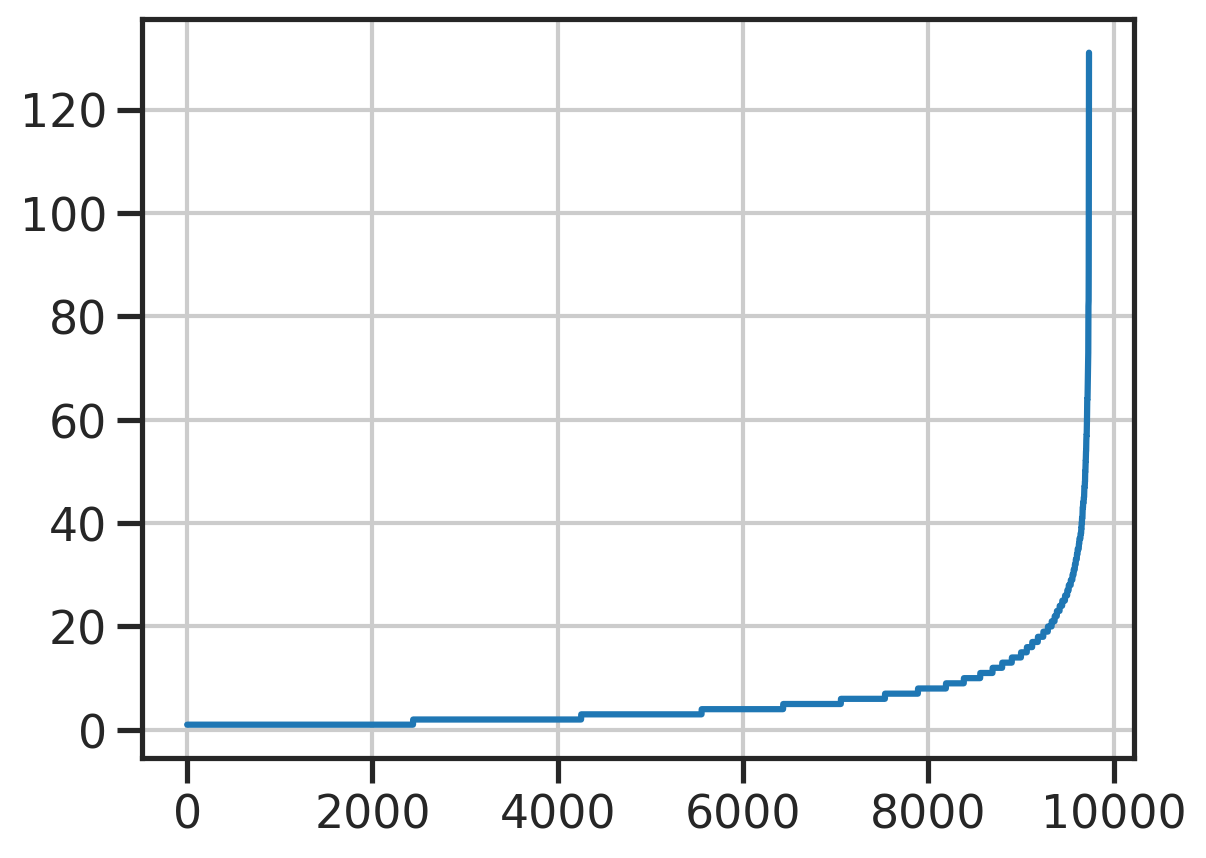

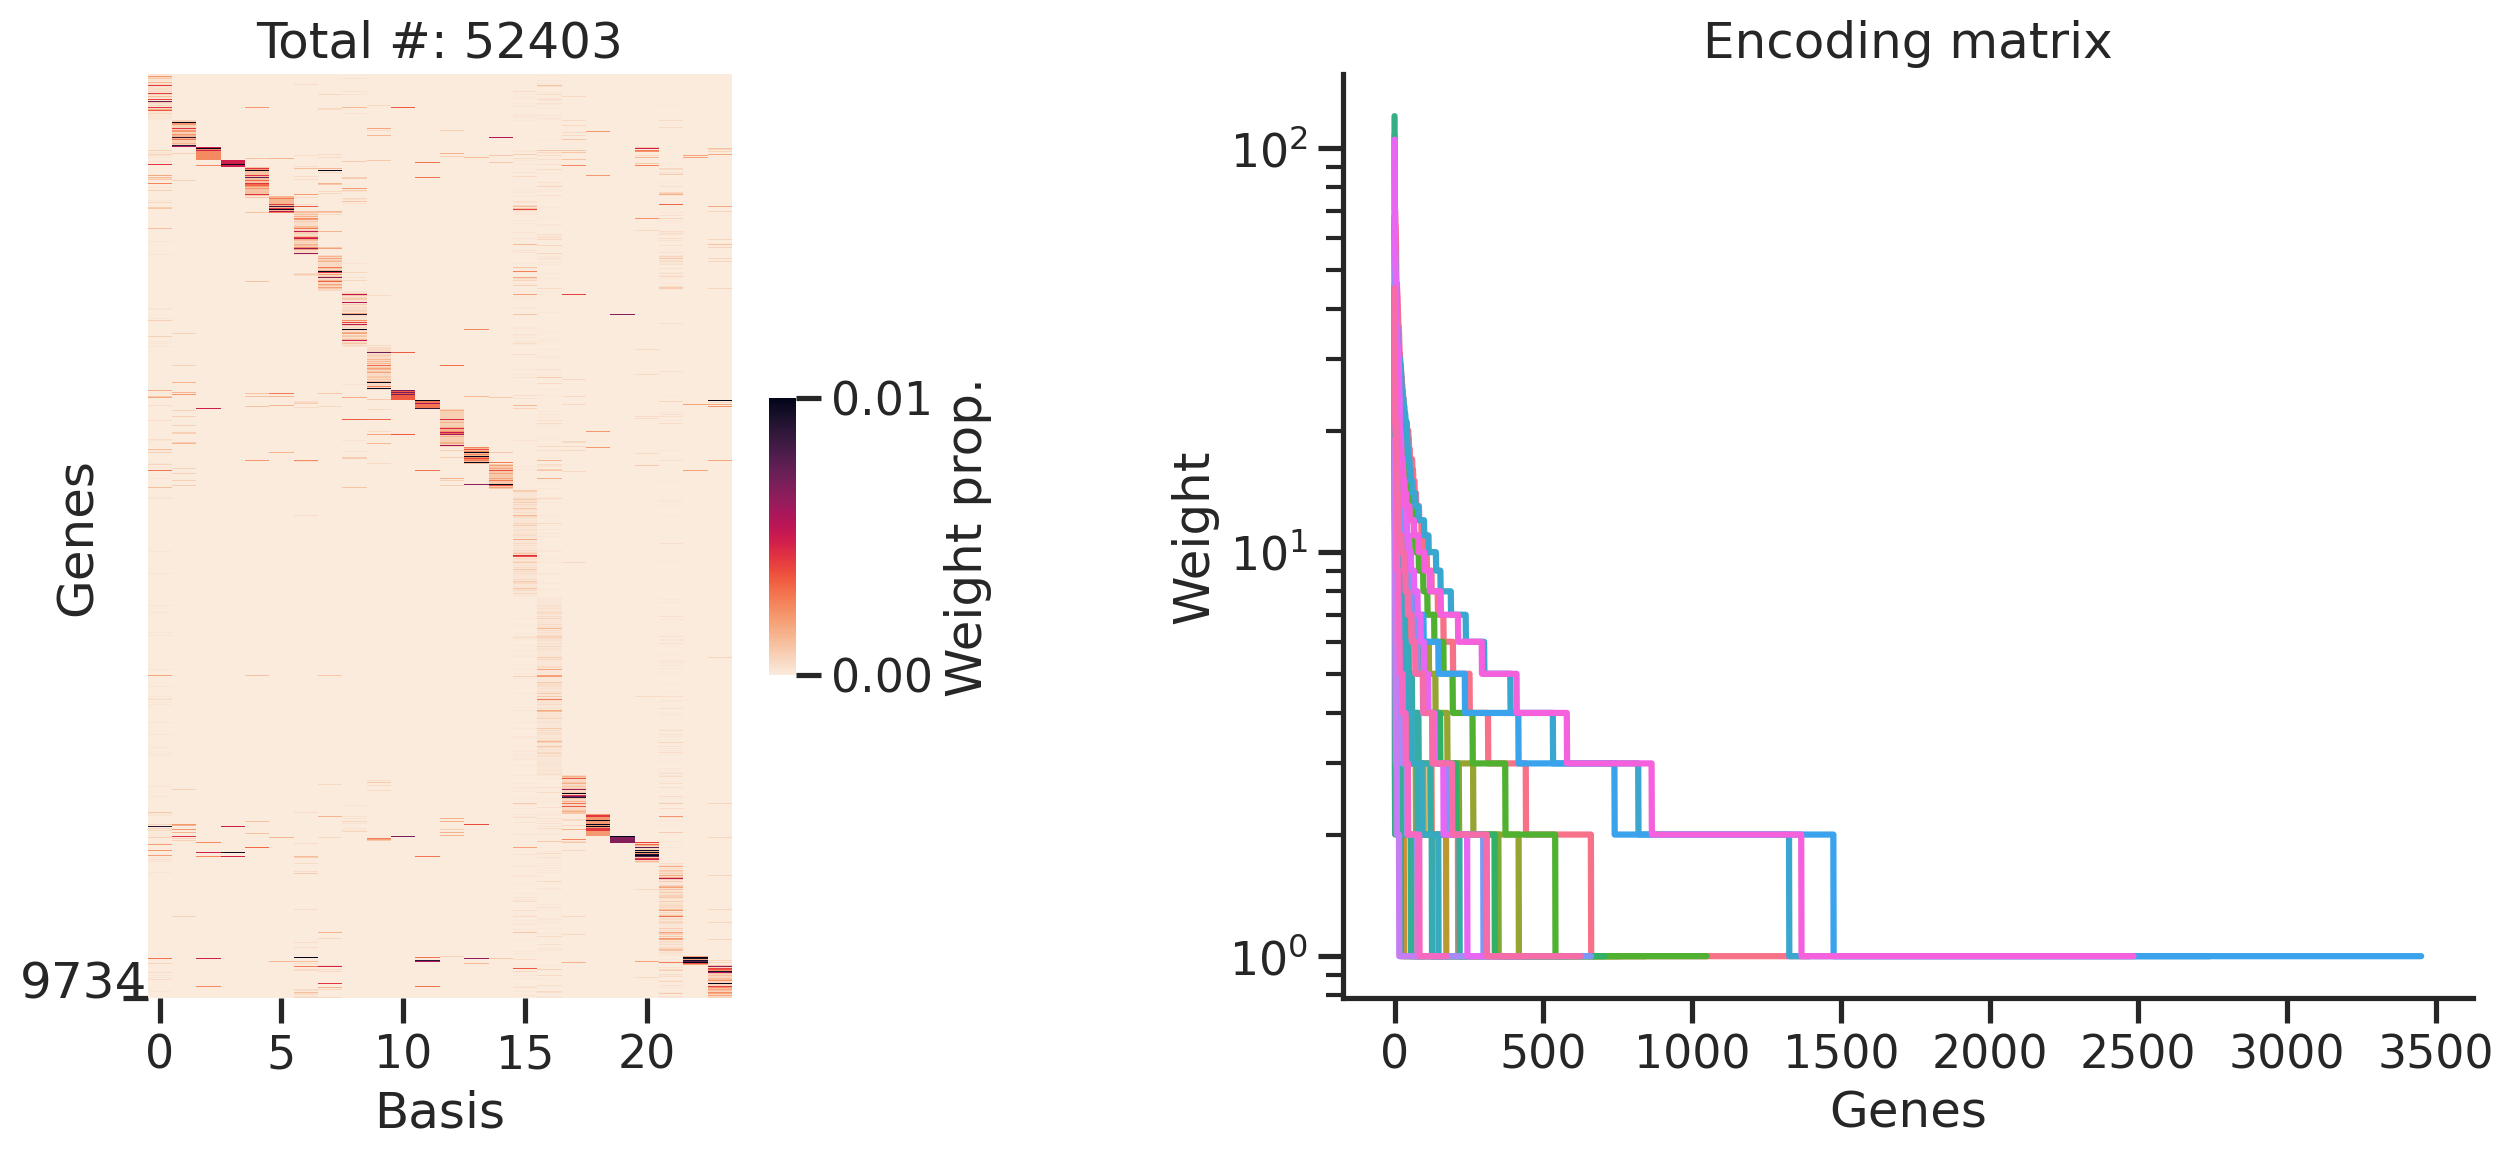

In [14]:
a = resall[resall['pfn']==f'pf_1']
pmat = a.groupby(['gn', 'rn']).size().unstack().fillna(0).astype(int)
nzero_prbe_cond = pmat.sum(axis=1) > 0
pospmat = pmat[nzero_prbe_cond]
fpmat = pospmat.divide(pospmat.sum(axis=0), axis=1)
print(pmat.shape, pospmat.shape, fpmat.shape)
print(pmat.sum(axis=0))
plt.plot(np.sort(pmat.sum(axis=1)))

plot_enc(pmat, fpmat, pmat, fpmat, title="")

(6654, 24) (6654, 24) (6654, 24)
rn
RS0095       1061
RS0109        468
RS0175        356
RS0237        374
RS0307        752
RS0332        920
RS0384       2296
RS0406       1112
RS0451        636
RS0468        555
RS0548        402
RS156.0       183
RS278.0      2023
RS313.0       458
RS64.0       3560
RS643.0       475
RS740.0      4576
RS810.0      2148
RSN1252.0     262
RSN1807.0     196
RSN2336.0    3555
RSN4287.0    1239
RSN9535.0    4947
RSN9927.0    3365
dtype: int64


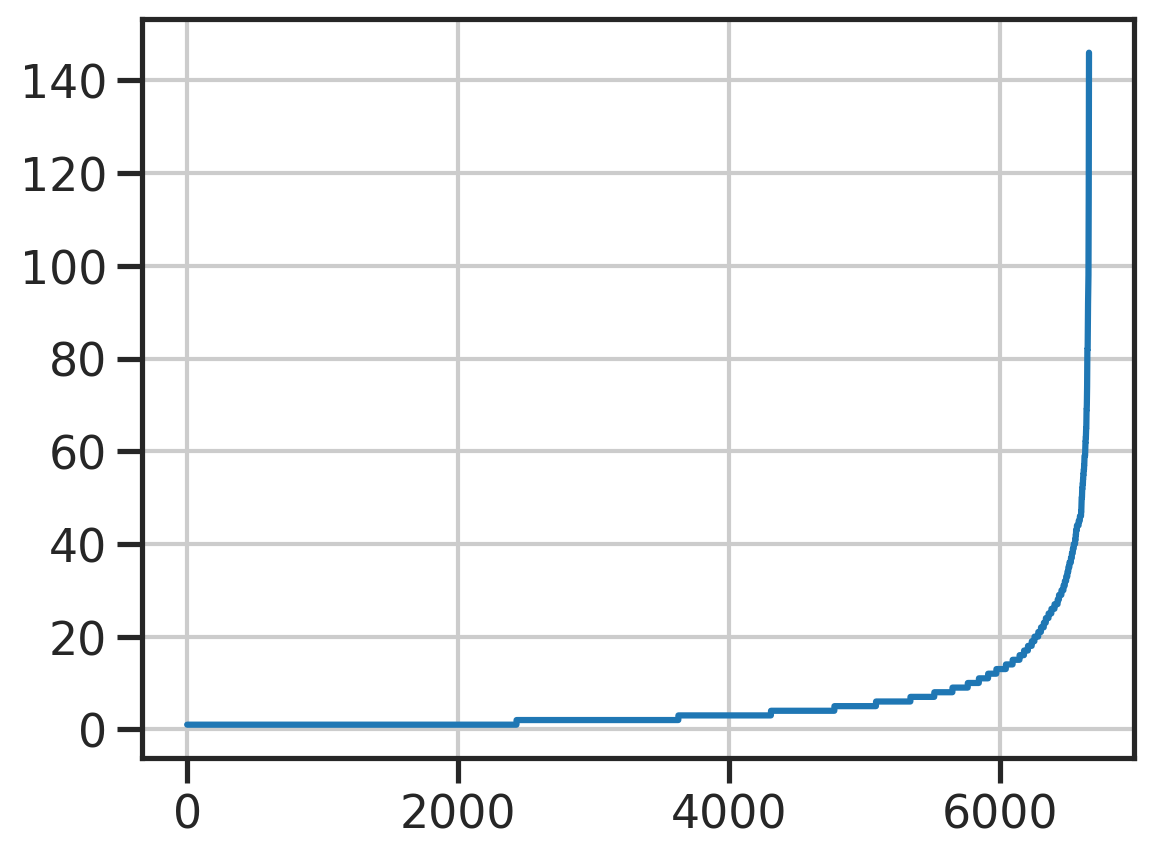

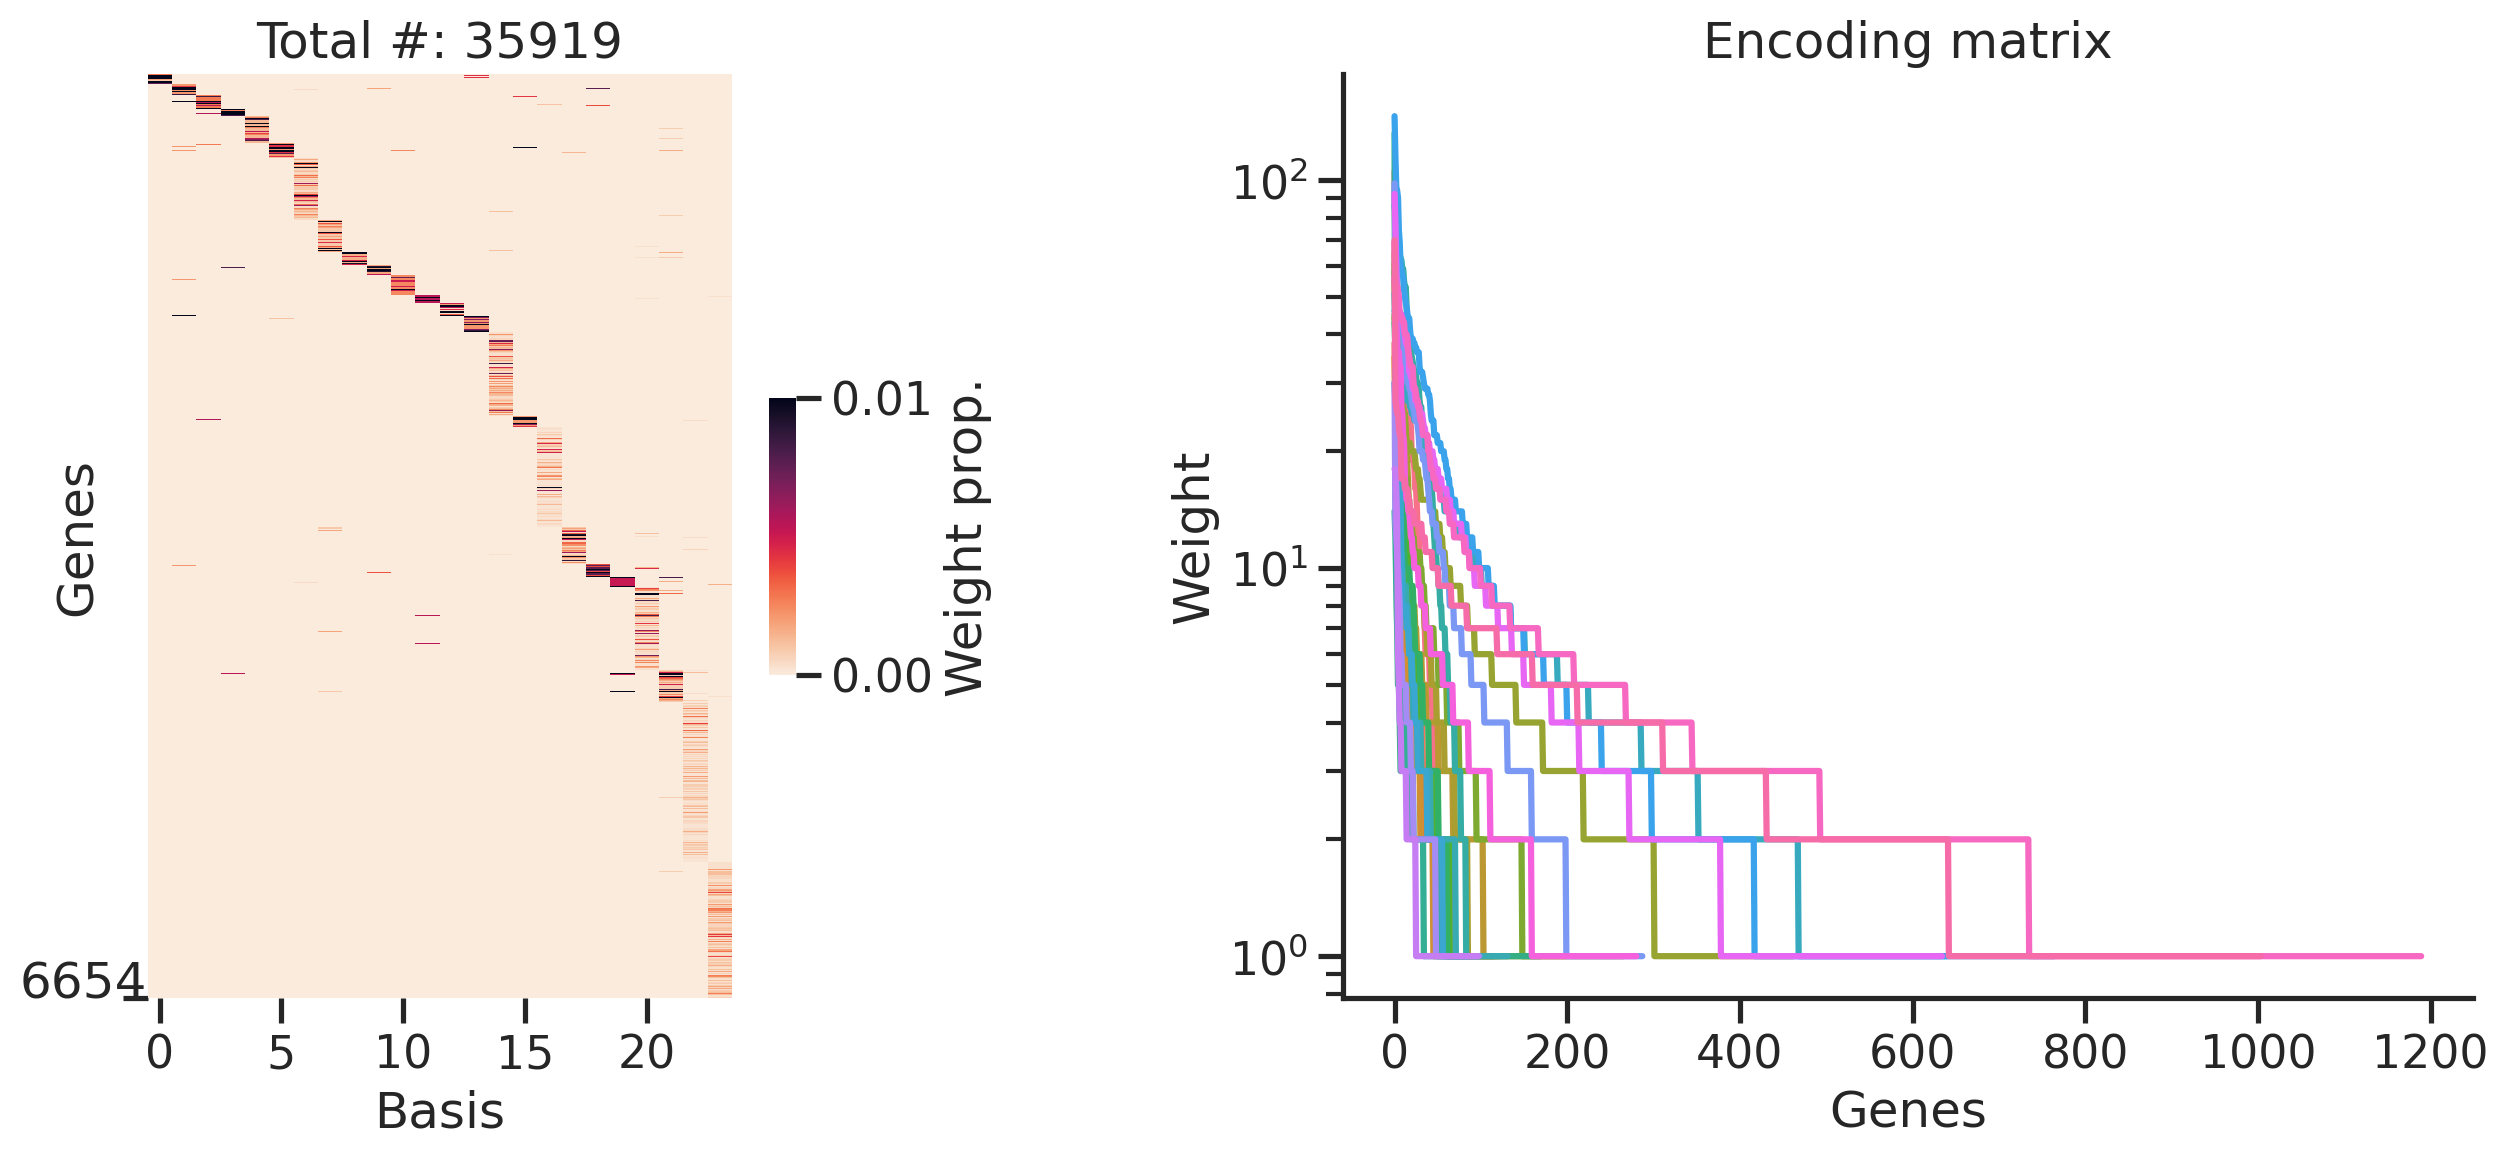

In [15]:
a = resall[resall['pfn']==f'pf_2']
pmat = a.groupby(['gn', 'rn']).size().unstack().fillna(0).astype(int)
nzero_prbe_cond = pmat.sum(axis=1) > 0
pospmat = pmat[nzero_prbe_cond]
fpmat = pospmat.divide(pospmat.sum(axis=0), axis=1)
print(pmat.shape, pospmat.shape, fpmat.shape)
print(pmat.sum(axis=0))
plt.plot(np.sort(pmat.sum(axis=1)))

plot_enc(pmat, fpmat, pmat, fpmat, title="")

In [16]:
a = resall[resall['pfn']==f'pf_3']
pmat = a.groupby(['rn', 'gn']).size().unstack().fillna(0).astype(int)
nzero_prbe_cond = pmat.sum(axis=1) > 0
pospmat = pmat[nzero_prbe_cond]
fpmat = pospmat.divide(pospmat.sum(axis=0), axis=1)
print(pmat.shape, pospmat.shape, fpmat.shape)

(1, 136) (1, 136) (1, 136)
